In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colorbar as mcb
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot, finalizePlot

In [5]:
initPlot()


In [6]:
def get_bootstrap_error_cov(map3, B):
    Nthetas=map3.shape[0]
    Nrealisations=map3.shape[1]

    bootstrapCovs=np.zeros((B, Nthetas, Nthetas))

    for b in range(B):
        indices=np.random.randint(0, Nrealisations, Nrealisations)
        map3_tmp=map3[:,indices]
        bootstrapCovs[b]=np.cov(map3_tmp)

    return np.std(bootstrapCovs, axis=0)

In [7]:
ix=[]
N_meas=6
count=0
for i in range(N_meas):
    for j in range(i, N_meas):
        for k in range(j, N_meas):
            if (i>0) and (i<5) and (j>0) and (j<5) and (k>0) and (k<5):
                ix.append(count)
            count+=1

print(ix)


[21, 22, 23, 24, 26, 27, 28, 30, 31, 33, 36, 37, 38, 40, 41, 43, 46, 47, 49, 52]


In [8]:
# Load Data

dir_takahashi="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/"

cov_fft=np.load(dir_takahashi+"Map_cov_KiDS1000_squarepatches_0.npy")[N_meas:, N_meas:]
cov_fft=cov_fft[ix,:][:,ix]
cov_T1inf=np.loadtxt(dir_takahashi+"cov_infinite_term1Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T2=np.loadtxt(dir_takahashi+"cov_square_term2Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T4=np.loadtxt(dir_takahashi+"cov_infinite_term4Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T5=np.loadtxt(dir_takahashi+"cov_infinite_term5Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T6=np.loadtxt(dir_takahashi+"cov_square_term6Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
cov_T7=np.loadtxt(dir_takahashi+"cov_infinite_term7Numerical_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
#map3=np.loadtxt(dir_takahashi+"map_cubed")


In [9]:
# Set Thetas labels
thetas_ind = np.array([[4, 4, 4], [4, 4, 8], [4, 4, 16], [4,4,32], [4, 8, 8], [4, 8, 16], [4,8,32], [4,16,16],
                        [4, 16, 32], [4, 32, 32], [8, 8, 8], [8, 8, 16], [8,8,32],
                         [8, 16, 16], [8,16,32], [8, 32, 32], [16, 16, 16], [16, 16, 32], [16, 32,32], [32, 32,32]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

# Plot Heatmap

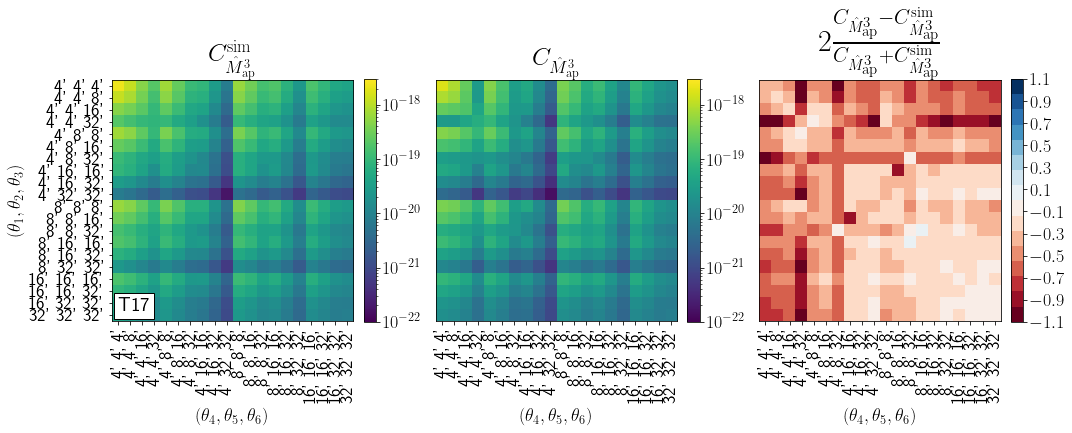

In [10]:
fig, ax=plt.subplots(ncols=3, figsize=(15,6))
#plt.subplots_adjust(hspace=0, wspace=0.04)

cov_tot=(cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7)

ax[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])



ax[0].set_title(r"$C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}$", size=25)
im=ax[0].imshow(cov_fft, norm=LogNorm(vmin=1e-22, vmax=3e-18))

fig.colorbar(im, ax=ax[0],fraction=0.046, pad=0.04)
ax[0].text(0,N-1, r"T17", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)

ax[1].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}$", size=25)
im=ax[1].imshow(cov_tot, norm=LogNorm(vmin=1e-22, vmax=3e-18))

fig.colorbar(im, ax=ax[1],fraction=0.046, pad=0.04)


cmap=cm.get_cmap('RdBu', 11)
vmin=-1.1
vmax=1.1


ax[2].set_title(r"$2\frac{C_{\hat{M}_\mathrm{ap}^3}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{C_{\hat{M}_\mathrm{ap}^3}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)
cmap=cm.get_cmap('RdBu', 16)

im2=ax[2].imshow(2*(cov_tot-cov_fft)/(cov_tot+cov_fft), vmin=vmin, vmax=vmax, cmap=cmap)
#fig.colorbar(im2, ax=ax[2],fraction=0.046, pad=0.04, ticks=[-0.18, -0.14, -0.10, -0.06, -0.02, 0.02, 0.06, 0.10, 0.14, 0.18])

fig.colorbar(im2, ax=ax[2],  fraction=0.046, pad=0.04, ticks=[-1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7])
finalizePlot(ax, outputFn=dir_takahashi+"/ComparisonTakahashi_analytical_simulation.png", showlegend=False)


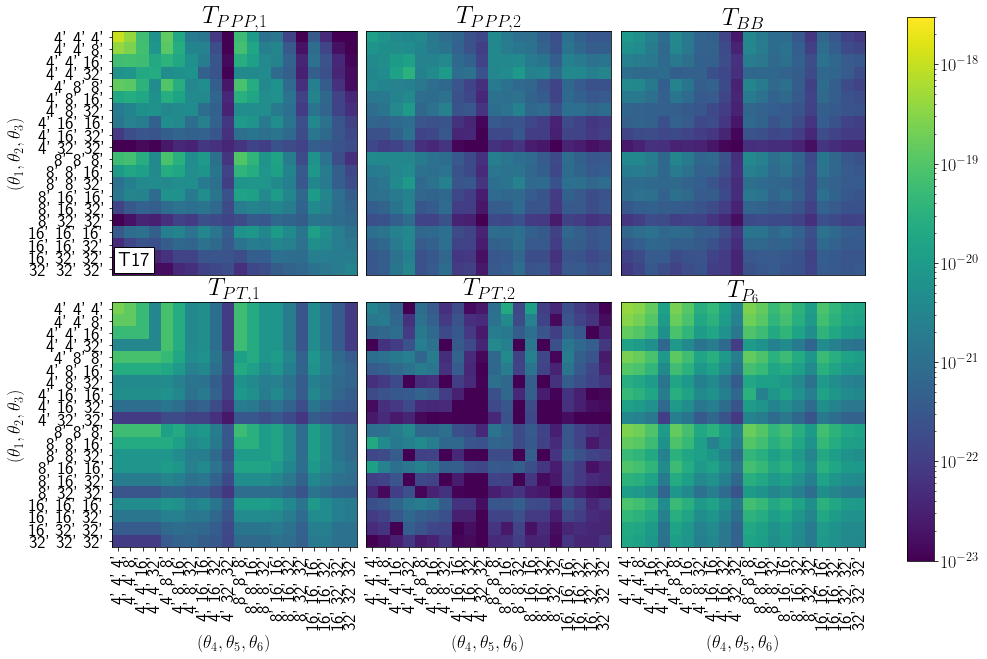

In [11]:
fig, axs=plt.subplots(ncols=3, nrows=2, figsize=(15,10))
plt.subplots_adjust(hspace=0, wspace=0.04)

#plt.subplots_adjust(hspace=0, wspace=0.04)

vmin=1e-23
vmax=3e-18

axs[0,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
axs[0,0].set_yticks(thetas_ticks)
axs[0,0].set_yticklabels(thetas_labels)
axs[0,0].set_xticks([])

axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[1,0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
axs[1,0].set_yticks(thetas_ticks)
axs[1,0].set_yticklabels(thetas_labels)
axs[1,0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
axs[1,0].set_xticks(thetas_ticks)
axs[1,0].set_xticklabels(thetas_labels, rotation=90)

axs[1,1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
axs[1,1].set_xticks(thetas_ticks)
axs[1,1].set_xticklabels(thetas_labels, rotation=90)
axs[1,1].set_yticks([])
axs[1,2].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
axs[1,2].set_xticks(thetas_ticks)
axs[1,2].set_xticklabels(thetas_labels, rotation=90)
axs[1,2].set_yticks([])



axs[0,0].set_title(r"$T_{PPP, 1}$", size=25)
im=axs[0,0].imshow(cov_T1inf, norm=LogNorm(vmin=vmin, vmax=vmax))

axs[0,0].text(0,N-1, r"T17", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


axs[0,1].set_title(r"$T_{PPP, 2}$", size=25)
im=axs[0,1].imshow(cov_T2, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[0,2].set_title(r"$T_{BB}$", size=25)
im=axs[0,2].imshow(cov_T4, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[1,0].set_title(r"$T_{PT, 1}$", size=25)
im=axs[1,0].imshow(cov_T5, norm=LogNorm(vmin=vmin, vmax=vmax))



axs[1,1].set_title(r"$T_{PT, 2}$", size=25)
im=axs[1,1].imshow(cov_T6, norm=LogNorm(vmin=vmin, vmax=vmax))


axs[1,2].set_title(r"$T_{{P_6}}$", size=25)
im=axs[1,2].imshow(cov_T7, norm=LogNorm(vmin=vmin, vmax=vmax))

#ax[2].set_title(r"$2\frac{C_{\hat{M}_\mathrm{ap}^3}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}{C_{\hat{M}_\mathrm{ap}^3}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^3}}$", size=30)

fig.colorbar(im, ax=axs.ravel(), fraction=0.05)
finalizePlot(ax, outputFn=dir_takahashi+"/ComparisonTakahashi_analytical_simulation_individualTerms.png", showlegend=False, tightlayout=False)


# Plot diagonal with individual terms

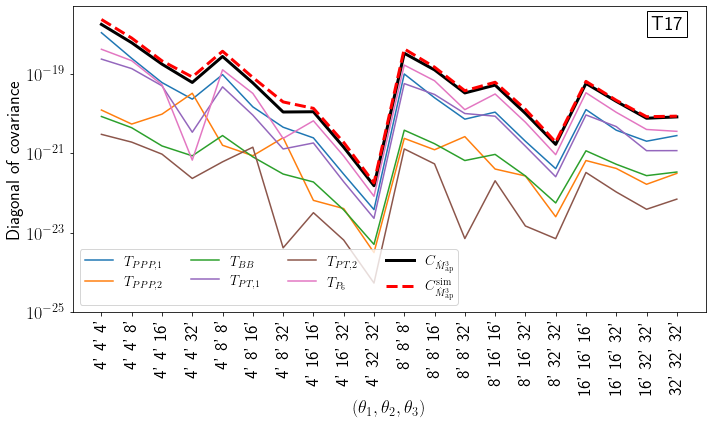

In [15]:
fig, ax=plt.subplots(figsize=(10,6))

#colors=cm.viridis_r(np.linspace(0.2, 1, 6))
#colors=cm.brg(np.linspace(0, 1, 6))
colors=cm.tab10([0,1,2,4,5,6])


#ax.set_title(r"Diagonal of covariance of $\langle M_\mathrm{ap}^3\rangle$ for SLICS")
ax.set_xlabel(r'$(\theta_1, \theta_2, \theta_3)$')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)
ax.set_yscale('log')
ax.set_ylim(1e-25, 5e-18)
ax.set_ylabel("Diagonal of covariance")
ax.plot(np.diag(cov_T1inf), label=r'$T_{PPP, 1}$', ls='-', color=colors[0])
ax.plot(np.diag(cov_T2), label=r'$T_{PPP, 2}$', ls='-', color=colors[1])
ax.plot(np.diag(cov_T4), label=r'$T_{BB}$', ls='-', color=colors[2])
ax.plot(np.diag(cov_T5), label=r'$T_{PT, 1}$', ls='-', color=colors[3])
ax.plot(np.diag(cov_T6), label=r'$T_{PT, 2}$', ls='-', color=colors[4])
ax.plot(np.diag(cov_T7), label=r'$T_{{P_6}}$', ls='-', color=colors[5])
ax.plot(np.diag(cov_tot), label=r'$C_{\hat{M}_\mathrm{ap}^3}$', color='k', lw=3)
ax.plot(np.diag(cov_fft), label=r'$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{sim}$', color='red', ls='--', lw=3)
ax.text(N-0.8, 3e-18, r"T17", bbox=dict(facecolor='white'), horizontalalignment='right', verticalalignment='top', size=20)



#ax.legend(bbox_to_anchor=(1, 1.03))

finalizePlot(ax, outputFn=dir_takahashi+"/ComparisonTakahashi_analytical_simulation_individualTerms_diagonal.png", showlegend=True, legendcols=4)
